#  Game success patterns analysis for the "Ice" online store

We need:
- to identify patterns that determine whether a game succeeds or not. 
- to spot potential big winners and plan advertising campaigns.

### Step 1. Open the data file and study the general information

In [1]:
!pip install --quiet squarify 
!pip install --quiet -U plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
import plotly.express as px
from scipy import stats as st

In [3]:
# Open the dataset and look at the first rows
games = pd.read_csv('games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Output the dataframe info
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [7]:
len(games['Name'].unique())

11560

In [8]:
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
games['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [10]:
games['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [11]:
games.duplicated().sum()

0

In [12]:
games['Critic_Score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

In [13]:
games['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
# Check if 'tbd' is related to recent games
games[games['User_Score']=='tbd']['Year_of_Release'].value_counts()

2009.0    405
2010.0    331
2008.0    326
2011.0    217
2002.0    192
2007.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: Year_of_Release, dtype: int64

### Conclusion of the step 1

- We have a dataset with 11 columns and **missig values** in the following fields:
    - **Name and Genre**: just 2 values are missing. Just skip these rows in the future analysis
    - **Year_of_Release**: just ~270 out of 16715 records do not have it...Perhaps there was no information in the data source or the year is missing due to an data export issue. It seems this field not worth waisting time  and also can be skipped. But below we'll consider the following options to fill NAs:
        - Some games contain the year in their names, so we could use it. But it's not an accurate way: typically release year is the previous one compared to the year from the name but sometimes it's the same.
        - In the recent years the game is typically released during the same year on all the platforms so we can use the information for the same game on other platforms but again we can make a mistake $\pm1$ year. For older games the release years can be different for different platforms.
        - The release year is a public well-known date so we can use open sources to make **data enrichment**. At least two services provide free public API to mine the game information: **IGDB.com and mobygames.com**. So it's the most accurate way.
    - **Rating**: ~7000 rows miss the rating info. It could be again the data export issue or simply it means that a game was not rated at all. The similar techniques can be used to fill NAs:
        - Use rating for the same game on other platforms
        - Use public sources to capture game info (see above).
    - **Critic and User score**: Similar to rating field **almost half of the data** miss the scores due to export issue or due to absence of reviews for the game. The same ideas can be used to fill NA here. As scores depend on the *personal tastes* the scores for the same game can *significantly* vary in different data sources as site audience varies. So as we don't know the exact source of the scores we'll not take a risk to distort the data and use only the scores from the dataset. So some options are:
        - Use scores for the same game on other platforms
        - Consider average scores for the genre for the same year (it's not an accurate method especially for such a big number of missing values so we'll not use it).

- **User score** should be a numeric field so we'll replace a string value **'tbd'** with **NaN** as it has the same meaning (as was seen above, 'to be determined' is actually a missing value as it's not restored for years).
- We'll convert: **release year** to int64 and **user score** to float64. As there're NaN values for Critic score we can't convert it to int64 unless shrink the data or filling NaNs with 0s which is not a good way as it may skew the statistics.
- Some **names** have leading spaces so we'll use strip() method to get rid of extra spaces.
- **Raing** has outdated values such as **'K-A'** (Kids to adults) and **'EC'** (early childhood) which are equivalent to 'E' so we'll replace those with the modern values.
- We also observe a lot of zero sales across the regions: it can be either missing values or true zero sales (if for example the game was **not** sold in that region but had sales in other regions). 

### Step 2. Prepare the data

- Replace the column names (make them lowercase).
- Convert the data to the required types.
- Describe the columns where the data types have been changed and why.
- If necessary, decide how to deal with missing values:
    - Explain why you filled in the missing values as you did or why you decided to leave them blank.
    - Why do you think the values are missing? Give possible reasons.
    - Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
- Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [15]:
# 1. Make columns lowercase and check
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [16]:
# 2. Get all games with missing year
games_no_year = games[games['year_of_release'].isna()][['name','platform']]
games_no_year

,name,platform
183,Madden NFL 2004,PS2
377,FIFA Soccer 2004,PS2
456,LEGO Batman: The Videogame,Wii
475,wwe Smackdown vs. Raw 2006,PS2
609,Space Invaders,2600
...,...,...
16373,PDC World Championship Darts 2008,PSP
16405,Freaky Flyers,GC
16448,Inversion,PC
16458,Hakuouki: Shinsengumi Kitan,PS3


Let's save this dataframe into csv file for future use:
>```python
games_no_year.to_csv('noyear.csv')
```

In [17]:
# 3. Get games whose name contains year
games_no_year[games_no_year['name'].str.contains('19\d{2}|20\d{2}')]

,name,platform
183,Madden NFL 2004,PS2
377,FIFA Soccer 2004,PS2
475,wwe Smackdown vs. Raw 2006,PS2
1650,NASCAR Thunder 2003,PS2
2572,PES 2009: Pro Evolution Soccer,PSP
3486,Madden NFL 2002,XB
4775,NFL GameDay 2003,PS2
5156,NBA Live 2003,XB
5336,Tomb Raider (2013),PC
5655,All-Star Baseball 2005,PS2


Not so many games we could try to guess the release year.
Let's do it as discussed: release year = year from the name - 1.

In [18]:
games['year_of_release'] = games['year_of_release'].fillna(pd.to_numeric(games_no_year['name'].str.extract('(20\d{2})')[0]) -1)
# check for some values
games.loc[[183, 377, 475],:]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,2003.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN


In [19]:
games_no_year = games[games['year_of_release'].isna()]['name']
games_no_year.count()

252

In [20]:
# 4. Let's try the second way to use other platforms info for the same game
games.query('name in @games_no_year').groupby('name')['year_of_release'].apply(list).tail(20)

name
Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku                                    [nan]
Unreal Championship 2: The Liandri Conflict                                                       [nan]
Valkyria Chronicles III: Unrecorded Chronicles                                                    [nan]
Vegas Party                                                                                       [nan]
Virtua Quest                                                                                 [nan, nan]
WCW Backstage Assault                                                                     [1999.0, nan]
WRC: FIA World Rally Championship                                               [nan, nan, 2005.0, nan]
WarioWare: Twisted!                                                                               [nan]
Wet                                                                                       [2009.0, nan]
Wheel of Fortune                                           

We could use the following code to fill the missing year:
>```python
year_other_platform = games.query('name in @games_no_year').groupby('name')['year_of_release'].transform('first')
games['year_of_release'] = games['year_of_release'].fillna(year_other_platform, axis='index')
```

But as it's shown above it's not an accurate way for the case when there're different release years.

So let's try the 3d method: capture data from the open sources. 
Above we've already saved name-platforms pairs into **noyear.csv**.

Let's do the same for the games without rating.
Let's save this info into csv file:
>```python
games_no_rating = games[games['rating'].isna()][['name','platform']]
games_no_rating.to_csv('norating.csv')
```

_get_games.py_ script contains a python code we've written to capture the data via public IGDB.com API. The similar program was also used to get data from mobygames.com.
We've got 4 files: for year and rating from each of the two data sources having index, name, platform, rating and year.

We'll use them to fill the missing values.

In [21]:
# 5. Let's use the mined data to fill NaNs
no_year = pd.read_csv('games_igdb_year.csv')
no_year = no_year.set_index('index')
games['year_of_release'] = games['year_of_release'].fillna(no_year['release_year'], axis='index')

no_year = pd.read_csv('games_moby_year.csv')
no_year = no_year.set_index('index')
games['year_of_release'] = games['year_of_release'].fillna(no_year['release_year'], axis='index')

no_rating = pd.read_csv('games_igdb_rating.csv')
no_rating = no_rating.set_index('index')
games['rating'] = games['rating'].fillna(no_rating['rating'], axis='index')

no_rating = pd.read_csv('games_moby_rating.csv')
no_rating = no_rating.set_index('index')
games['rating'] = games['rating'].fillna(no_rating['rating'], axis='index')

# ... and check for some indexes
games.loc[[456, 609, 16522, 2157, 11338, 86, 95, 2364, 600, 2398],:]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,2008.0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,1980.0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,E
16522,Virtua Quest,GC,2004.0,Role-Playing,0.01,0.00,0.00,0.00,55.0,5.5,T
2157,Wheel of Fortune,PS2,1987.0,Misc,0.47,0.36,0.00,0.12,NaN,tbd,E
11338,Charm Girls Club: My Fashion Show,DS,2009.0,Simulation,0.08,0.00,0.00,0.01,NaN,tbd,E
86,Mario & Sonic at the Olympic Games,Wii,2007.0,Sports,2.57,3.86,0.66,0.91,NaN,NaN,E
95,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,3.78,2.17,1.31,0.31,NaN,NaN,E
2364,Buzz! The Mega Quiz,PS2,2007.0,Misc,0.32,0.06,0.00,0.50,NaN,NaN,E10+
600,Super Mario All-Stars: Limited Edition,Wii,2010.0,Platform,0.99,0.52,0.92,0.14,NaN,NaN,E
2398,Buzz! Master Quiz,PSP,2008.0,Misc,0.20,0.44,0.00,0.23,NaN,NaN,E10+


Let's now return to the second method and fill the rating based on other platforms

In [22]:
# 6. Let's now return to the second method and fill the rating based on other platforms
games_no_rating = games[games['rating'].isna()]['name']
rating_other_platform = games.query('name in @games_no_rating').groupby('name')['rating'].transform('first')
games['rating'] = games['rating'].fillna(rating_other_platform, axis='index')

As for year we have only 34 records, the most of them do not have other platforms to help, so let's stop here and just reduce the dataset for those 34 games.

In [23]:
# As for year we have only 34 records, the most of them do not have other platforms to help, 
# so let's stop here and just reduce the dataset for those 34 games.
games['year_of_release'].isna().sum()

34

In [24]:
no_year_names = no_year[no_year['release_year'].isna()]['name']
games.query('name in @no_year_names').groupby('name')['year_of_release'].apply(list).head(37)

name
AKB1/48: Idol to Guam de Koishitara...                                                           [2011.0, nan]
Agarest Senki: Re-appearance                                                                             [nan]
Atsumare! Power Pro Kun no DS Koushien                                                                   [nan]
Bikkuriman Daijiten                                                                                      [nan]
Breakaway IV                                                                                             [nan]
Brothers in Arms: Furious 4                                                                      [2012.0, nan]
Chou Soujuu Mecha MG                                                                                     [nan]
Dance! It's Your Stage                                                                           [2011.0, nan]
DanceDanceRevolution II                                                                                  [n

Now let's replace 'tbd' from user score and outdated ratings.

Also let's convert User score to numeric

In [25]:
# 7. Now let's replace 'tbd' from user score and outdated ratings
#   Also let's convert User score to numeric

games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = pd.to_numeric(games['user_score'])

games['rating'] = games['rating'].replace('K-A', 'E')
games['rating'] = games['rating'].replace('EC', 'E')

Now let's fill NaN with average critic and user score from other platforms for the same game

In [26]:
# 8. Now let's fill NaN with average critic and user score from other platforms for the same game
games_no_critic_score = games[games['critic_score'].isna()]['name']
critic_score_other_platform = games.query('name in @games_no_critic_score').groupby('name')['critic_score'].transform('mean')
games['critic_score'] = games['critic_score'].fillna(critic_score_other_platform, axis='index')

games_no_user_score = games[games['user_score'].isna()]['name']
user_score_other_platform = games.query('name in @games_no_user_score').groupby('name')['user_score'].transform('mean')
games['user_score'] = games['user_score'].fillna(user_score_other_platform, axis='index')

Check Name/genre missing values

In [27]:
# 9. Check Name/genre missing values
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Reduce to DF without missing years, names and genres

In [28]:
# 10. Reduce to DF without missing years, names and genres
games_good = pd.DataFrame(games[(~games['name'].isna())  & (~games['year_of_release'].isna())])
games_good.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [29]:
# 11. Convert release year to int and strip the game name
games_good['year_of_release'] = games_good['year_of_release'].astype('int')
games_good['name'] = games_good['name'].str.strip()

In [30]:
games_good.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16679 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16679 non-null  object 
 1   platform         16679 non-null  object 
 2   year_of_release  16679 non-null  int32  
 3   genre            16679 non-null  object 
 4   na_sales         16679 non-null  float64
 5   eu_sales         16679 non-null  float64
 6   jp_sales         16679 non-null  float64
 7   other_sales      16679 non-null  float64
 8   critic_score     9098 non-null   float64
 9   user_score       8689 non-null   float64
 10  rating           12446 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


In [31]:
# 12. Check what zeros mean
games_good[(games_good['na_sales']==0) & (games_good['eu_sales']==0) &  (games_good['jp_sales']==0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8045,Summer Athletics: The Ultimate Challenge,PS2,2008,Sports,0.0,0.0,0.0,0.18,48.0,NaN,E
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.00,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.00,NaN,NaN,NaN


So it really seems that zeros are **true zero sales**: some games are sold in the *specific region* and only 3 games have zero sales in all of the 3 main regions.

In [32]:
# 13. Add a total sales column
games_good['total_sales'] =  games_good['na_sales'] + games_good['eu_sales'] + games_good['jp_sales'] + games_good['other_sales']

### Step 3. Analyze the data

- Look at how many games were released in different years. Is the data for every period significant?
- Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
- Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
- Work only with the data that you've decided is relevant. Disregard the data for previous years.
- Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
- Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
- Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
- Keeping your conclusions in mind, compare the sales of the same games on other platforms.
- Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

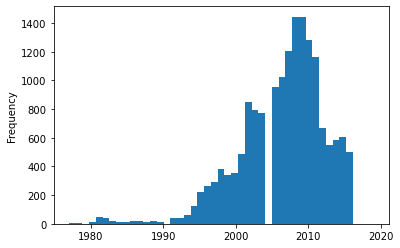

In [33]:
games_good['year_of_release'].plot(kind='hist', bins=45)

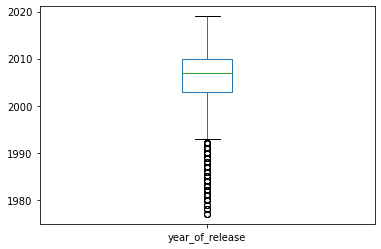

In [34]:
games_good['year_of_release'].plot(kind='box')

In [35]:
games_good['year_of_release'].describe()


count    16679.000000
mean      2006.462738
std          5.915424
min       1977.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2019.000000
Name: year_of_release, dtype: float64

In [36]:
games_good[games_good['year_of_release']>2016]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13781,GRID,PC,2019,Racing,0.0,0.03,0.0,0.01,87.0,7.9,E,0.04


We see that mostly we have the information for years from 2003 to 2016 (we omit 2019 as an outlier).
So let's consider the period from 2000 to 2016 for now to observe the platforms.

Let's look at total sales per platform distribution.

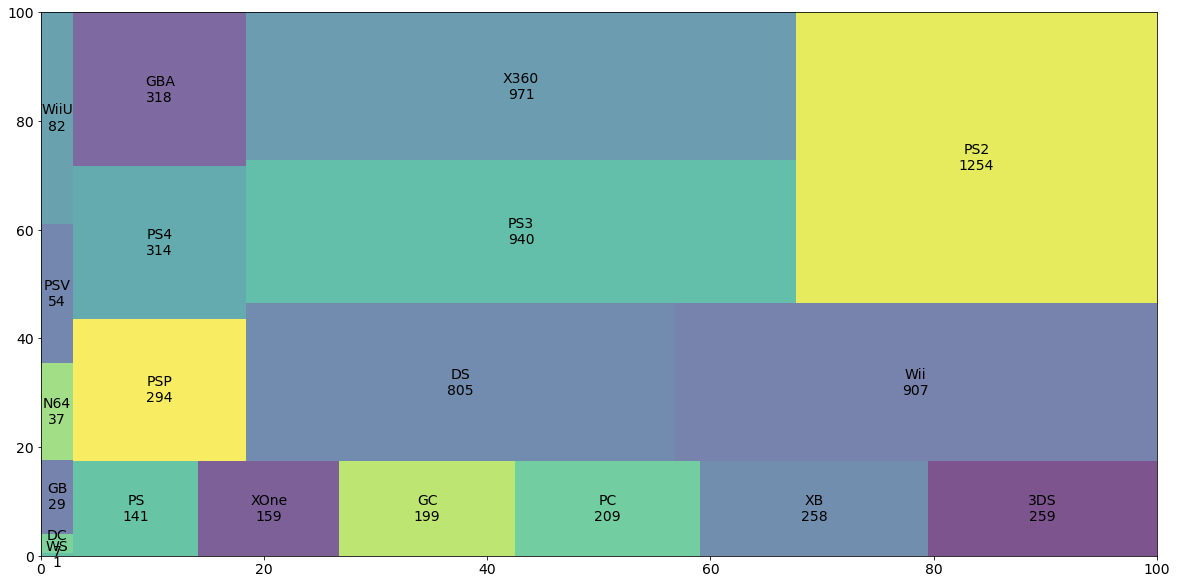

In [37]:
platforms_total = games_good.query('year_of_release >= 2000 and year_of_release < 2017'
                                  )[['platform', 'total_sales']].groupby('platform').sum().sort_values('total_sales'
                                                                                                      ).reset_index()

plt.rc('font', size=14)
plt.figure(figsize=(20,10))
labels = platforms_total.apply(lambda row: str(row[0])+'\n'+str(round(row[1])),axis=1)
squarify.plot(sizes=platforms_total.total_sales, label=labels, alpha=0.7)

plt.show()





In [38]:
# Now let's group by platform and year
platforms_yearly = games_good.query('year_of_release >= 2000 and year_of_release < 2017').groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'})
platforms_yearly.describe()

,total_sales
count,151.000000
mean,47.943907
std,54.243713
min,0.020000
25%,6.460000
50%,26.150000
75%,67.925000
max,212.430000


Top 25% total sales are more than 67.9, so let's use it as a threshold to filter out the most profitable platforms.

In [39]:

platforms_yearly.sort_values('total_sales', ascending=False).query('total_sales > 67')

total_sales
platform year_of_release             
PS2      2004                  212.43
         2002                  210.57
Wii      2009                  208.20
PS2      2003                  193.20
Wii      2008                  178.96
X360     2010                  170.59
PS2      2001                  166.82
         2005                  164.10
PS3      2011                  159.76
Wii      2007                  153.85
DS       2007                  147.24
X360     2011                  147.20
DS       2008                  145.95
PS3      2010                  143.62
Wii      2006                  139.72
X360     2008                  137.00
PS3      2009                  131.31
DS       2005                  130.14
Wii      2010                  129.72
X360     2009                  121.13
DS       2009                  119.92
         2006                  119.87
PS3      2008                  119.55
PS4      2015                  118.90
PS3      2013                  113.46
         2012                  107.43
PS2      2006                  104.31
PS4      2014                  100.00
X360     2012                   99.81
         2007                   97.88
PS       2000                   96.76
X360     2013                   88.58
DS       2010                   85.49
GBA      2004                   78.68
PS2      2007                   77.28
PS3      2007                   74.81
GBA      2002                   74.53
PS4      2016                   69.25

From the treemap and sorted table the following platforms are at the top: 
- "Wii", 
- "X360", 
- "PS3", 
- "PS4", 
- "DS", 
- "PS2"
- "GBA".

Let's build total sales distribution over the years for each platform

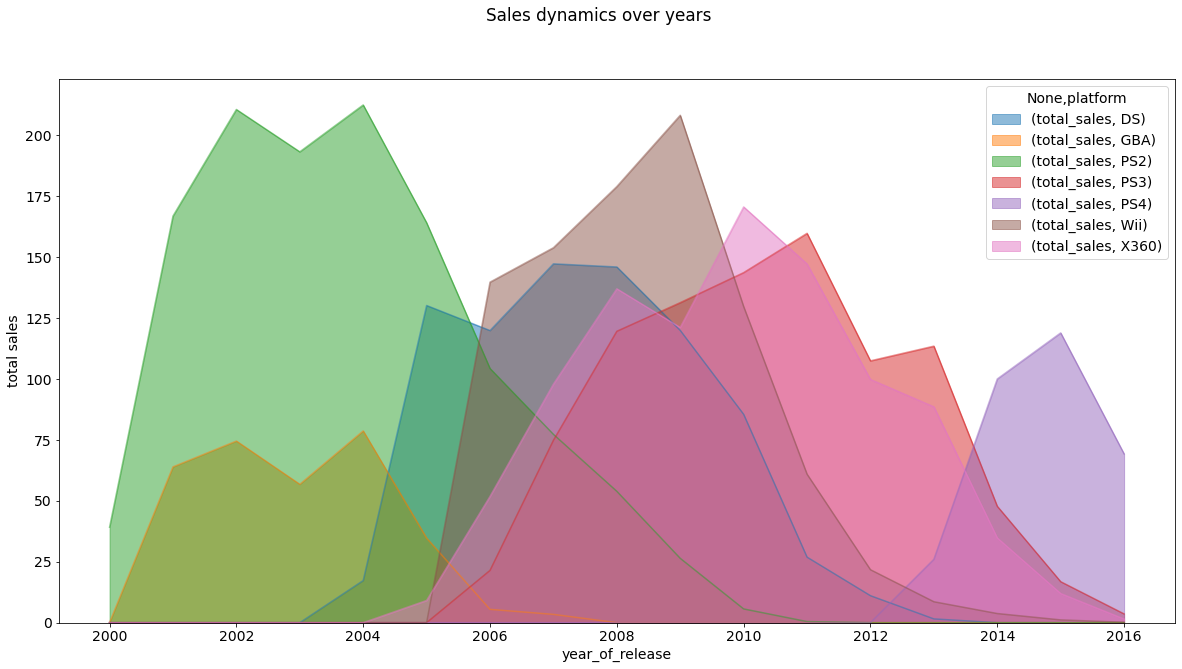

In [54]:
# Let's build total sales distribution over the years for each platform
top_platforms = ["Wii", "X360", "PS3", "PS4", "DS", "PS2", "GBA"]
platforms_yearly.query('platform in @top_platforms').unstack(level=0).plot(kind='area', figsize=(20, 10), stacked=False)
b = plt.ylabel("total sales")
b = plt.suptitle("Sales dynamics over years")    

From the plot we see that **PS2** used to be popular in 2000s and from 2011 it almost had zero sales. The same story for:
- **DS** whose life lasted from 2003 to 2013.
- **Wii** 2005 - 2015
- **X360** 2004 - 2016
- **PS3** 2005 - 2016
- **PS4** 2012 - seems still to be popular

So we see that generally platform's life lasts **10 years**: it usually has a rapid rise (2-3 years) to the top from the sales start and a slow sales reduction which usually lasts **5 years**. To make prognosis for 2017 we need to take data for the last 5 years to see the platforms which have noticeable sales. Those platforms which are on top less than 5 years have more chances to be the leaders in 2017.


In [52]:
# reduce the data to the last 5 years
platforms_last5 = platforms_yearly.query('year_of_release >= 2012 and year_of_release < 2017').unstack()
platforms_last5.columns = ['2012', '2013','2014','2015', '2016']
platforms_last5['total_over_5years'] = platforms_last5.sum(axis=1, skipna = True)
platforms_last5

,2012,2013,2014,2015,2016,total_over_5years
platform,,,,,,
3DS,51.78,56.57,43.76,27.78,15.14,195.03
DS,11.07,1.54,NaN,NaN,NaN,12.61
PC,24.11,12.66,13.28,8.53,5.29,63.87
PS3,107.43,113.46,47.76,16.82,3.60,289.07
PS4,NaN,25.99,100.00,118.90,69.25,314.14
PSP,7.69,3.14,0.24,0.12,NaN,11.19
PSV,16.45,10.59,11.90,6.25,4.25,49.44
Wii,21.73,8.59,3.75,1.14,0.18,35.39
WiiU,17.56,21.65,22.03,16.35,4.60,82.19


Let's see who are the leaders over 5 years

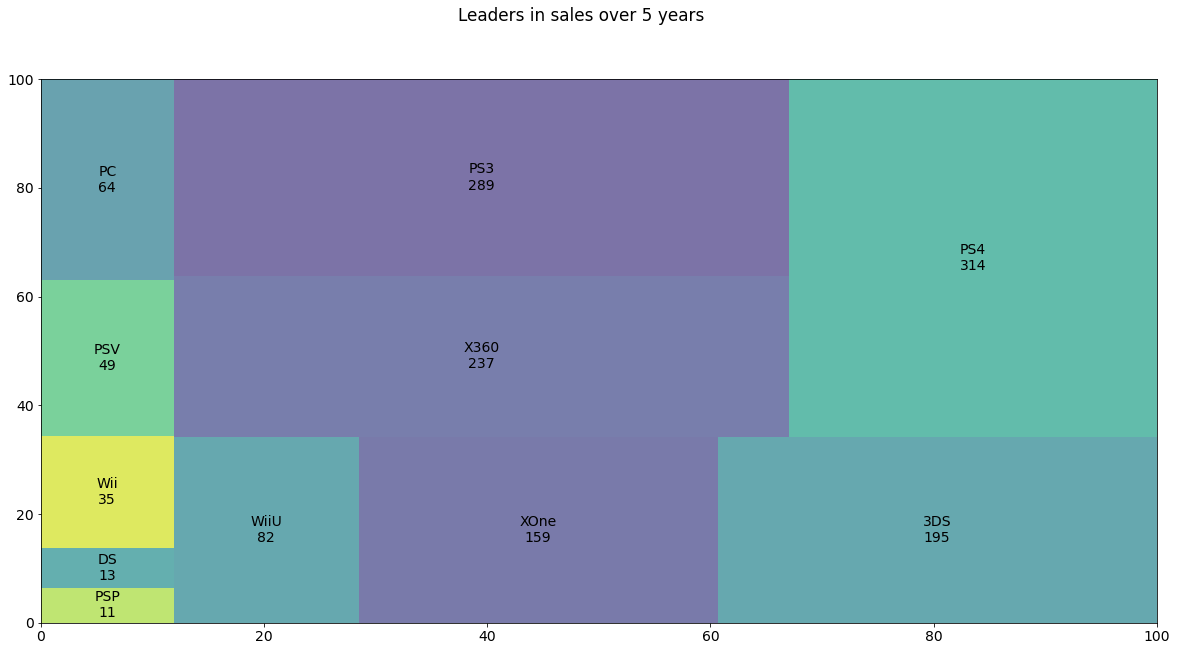

In [53]:
# Let's see who are the leaders over 5 years
platforms_total = platforms_last5.sort_values('total_over_5years').reset_index()[['platform', 'total_over_5years']]

plt.rc('font', size=14)
plt.figure(figsize=(20,10))
labels = platforms_total.apply(lambda row: str(row[0])+'\n'+str(round(row[1])),axis=1)
squarify.plot(sizes=platforms_total.total_over_5years, label=labels, alpha=0.7)
b = plt.suptitle("Leaders in sales over 5 years")    
plt.show()

The leaders over the last 5 years are:
- PS4 the youngest and potentially the most profitable
- PS3 (seen as shrinking above)
- X360 (seen as shrinking above)
- 3DS
- XOne

Now let's build the same yearly plot as above for the 5 platforms and calculate year to year difference and look at the most profitable platforms

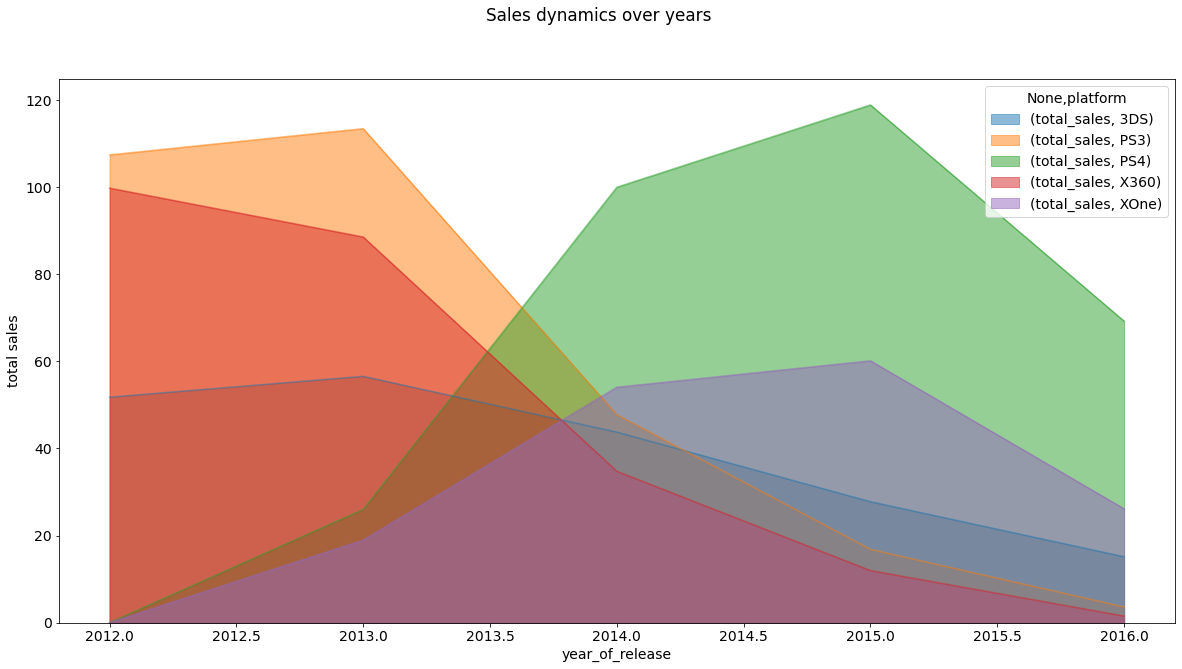

In [50]:
# Let's look at the dynamic over the years
top_platforms = [ "X360", "PS3", "PS4", "3DS", "XOne"]
platforms_yearly.query('platform in @top_platforms and year_of_release >= 2012 and year_of_release < 2017').unstack(level=0).plot(kind='area', figsize=(20, 10), stacked=False)
b = plt.ylabel("total sales")
b = plt.suptitle("Sales dynamics over years")    

We see that the leaders are:
- PS4 
- Xone
- 3DS

PS3 and X360 are shrinking since 2014 while the above still have reasonable sales though also there's a decrease in sales.

In [44]:
# Now let's calculate delta growth in % from year to year:
platforms_last5 = platforms_last5[['2012', '2013','2014','2015', '2016']].fillna(0)
delta = (platforms_last5 - platforms_last5.shift(+1, axis=1))
delta

,2012,2013,2014,2015,2016
platform,,,,,
3DS,NaN,4.79,-12.81,-15.98,-12.64
DS,NaN,-9.53,-1.54,0.00,0.00
PC,NaN,-11.45,0.62,-4.75,-3.24
PS3,NaN,6.03,-65.70,-30.94,-13.22
PS4,NaN,25.99,74.01,18.90,-49.65
PSP,NaN,-4.55,-2.90,-0.12,-0.12
PSV,NaN,-5.86,1.31,-5.65,-2.00
Wii,NaN,-13.14,-4.84,-2.61,-0.96
WiiU,NaN,4.09,0.38,-5.68,-11.75


Text(0.5, 1.0, 'Yearly sales changes in percent per platform')

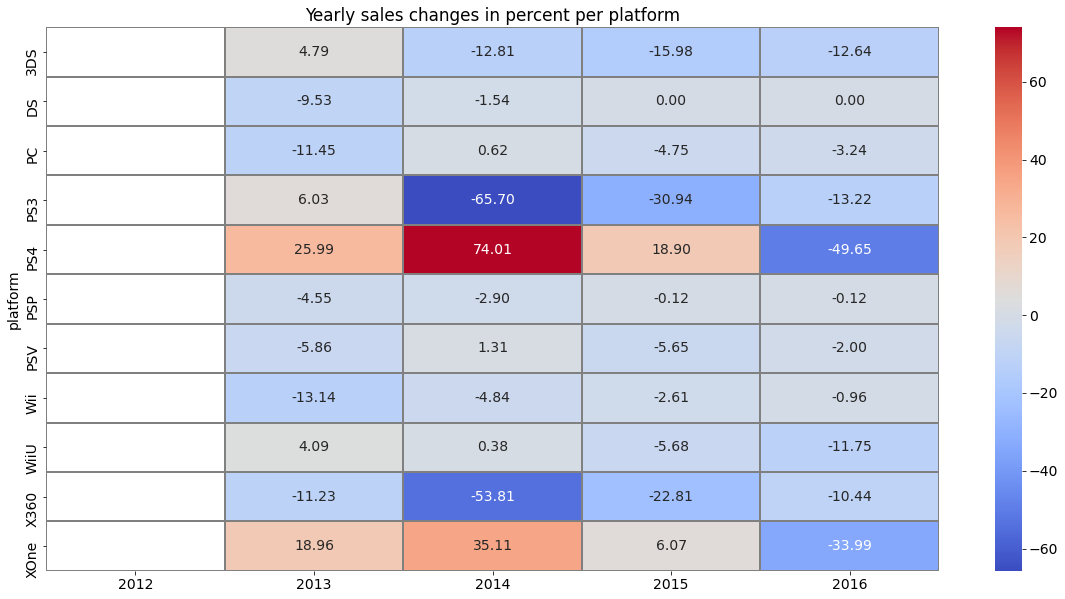

In [48]:
plt.figure(figsize=(20,10))
sns.heatmap(delta,  annot=True,  fmt='.2f', linewidths=1, linecolor='gray', cmap= 'coolwarm').set_title("Yearly sales changes in percent per platform")

PS4 and Xone showed a positive dynamic in the beginning of the period but negative in 2016, 3DS had a small increase and gradually went down. 

Now let's build boxplots of annual total sales for each platform.

In [56]:
# again take the original data and select the recent games and again group by platform and year 
platforms_yearly = games_good.query('year_of_release >= 2012 and year_of_release < 2017').groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
platforms_yearly.head()

,platform,year_of_release,total_sales
0,3DS,2012,51.78
1,3DS,2013,56.57
2,3DS,2014,43.76
3,3DS,2015,27.78
4,3DS,2016,15.14


In [57]:
#create supplementary array order to sort platforms by total sales over the period
order = platforms_yearly.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()['platform']
order

0      PS4
1      PS3
2     X360
3      3DS
4     XOne
5     WiiU
6       PC
7      PSV
8      Wii
9       DS
10     PSP
Name: platform, dtype: object

Text(0.5, 1.0, 'Sales distribution per platform')

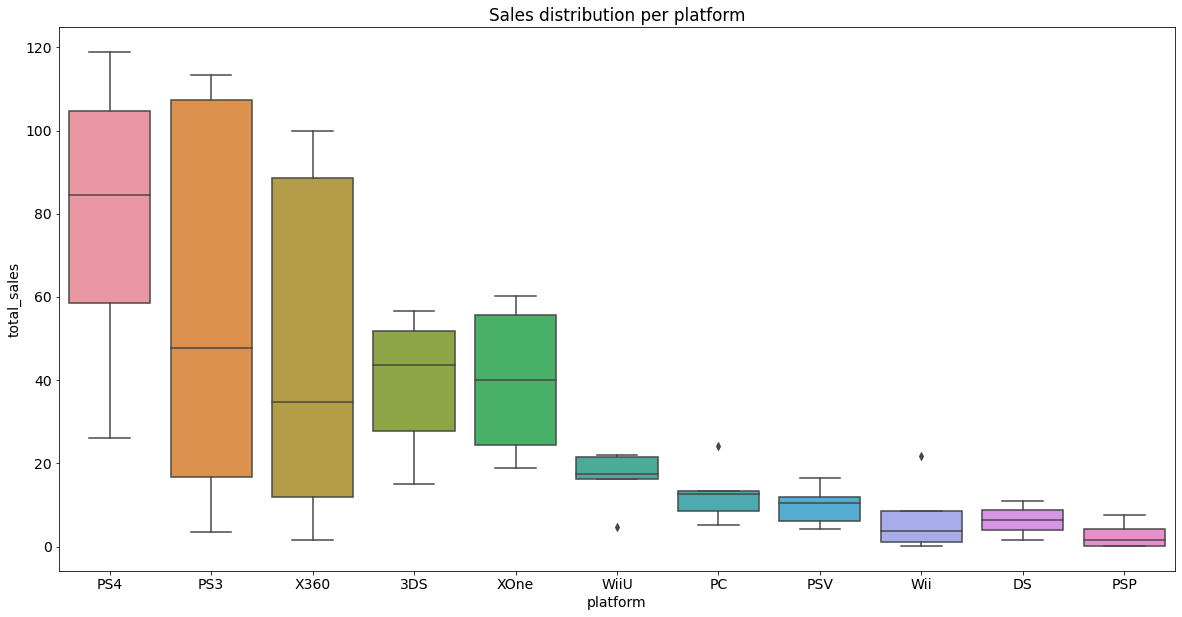

In [58]:
plt.figure(figsize=(20,10))
sns.boxplot(x='platform', y='total_sales', data=platforms_yearly, order=order).set_title("Sales distribution per platform")

We see some differences in sales:
- PS4 as a leader has a shorter range of sales with higher average and median sales than other platforms
- PS3 and X360 as shrinking platforms which used to be popular have lower averages but wider range from low to high values, due to high sales in the past the distribution are skewed to the right
- 3DS and XOne have higher median values than X360 but very short range of values. 3DS is skewed to the left so it seems that in the recent years it significantly decreases in sales. Xone at the same time has almost symmetrical distribution. According to the above plot over the years XOne behaves similar to PS4 but with lower values.
- other platforms have very narrow distribution range with significantly lower medians and averages.


Let's now take a look at how user and professional reviews affect sales for PS4. We'll build a scatter plot and calculate the correlation between reviews and sales. 

Then we'll compare the sales of the same games on other platforms.


In [60]:
PS4_data = games_good.query('platform=="PS4"')[['user_score', 'critic_score', 'total_sales']]
PS4_list = PS4_data[PS4_data.notnull().all(axis=1)]
PS4_list

,user_score,critic_score,total_sales
42,8.3,97.0,12.62
77,4.3,82.0,8.58
92,5.7,83.0,7.66
94,5.0,85.0,7.60
105,6.5,87.0,7.17
...,...,...,...
16486,2.3,42.0,0.01
16499,6.8,70.0,0.01
16500,7.5,69.0,0.01
16526,7.9,61.0,0.01


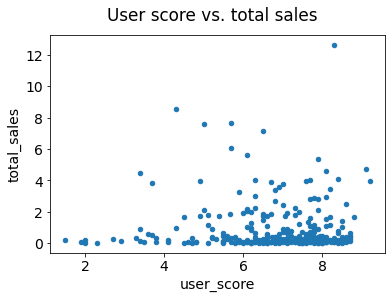

In [61]:
PS4_list.plot(kind='scatter', x='user_score',y='total_sales')
b = plt.suptitle("User score vs. total sales")    

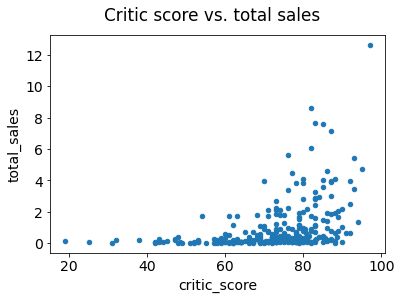

In [62]:
PS4_list.plot(kind='scatter', x='critic_score',y='total_sales')
b = plt.suptitle("Critic score vs. total sales")    

In [53]:
PS4_list.corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.563002,-0.026288
critic_score,0.563002,1.000000,0.390428
total_sales,-0.026288,0.390428,1.000000


It turns out that user scores almost does not affect the sales while critic scores have a moderate positive correlation (0.39). So generally, there's a small correlation: the higher critic score the higher sales are.

Let's check the same for other platforms:
- PS3
- X360
- Xone

In [54]:
PS4_names = games_good[games_good.index.isin(PS4_list.index)]['name']
platforms =['PS3', 'X360', 'XOne']
for platform in platforms:
    print("The correlation table for", platform)
    print('========')
    print(games_good.query('platform=="'+platform+ '" and name in @PS4_names')[['user_score', 'critic_score', 'total_sales']].corr())
    print()


The correlation table for PS3
              user_score  critic_score  total_sales
user_score      1.000000      0.289921     0.016136
critic_score    0.289921      1.000000     0.330123
total_sales     0.016136      0.330123     1.000000

The correlation table for X360
              user_score  critic_score  total_sales
user_score      1.000000      0.186264     0.009597
critic_score    0.186264      1.000000     0.314709
total_sales     0.009597      0.314709     1.000000

The correlation table for XOne
              user_score  critic_score  total_sales
user_score      1.000000      0.448485    -0.131060
critic_score    0.448485      1.000000     0.356115
total_sales    -0.131060      0.356115     1.000000



We observe that critic score have positive correlation with sales for other platforms as well while user scores have no effect on sales or even have a little negative correlation (e.g. for XOne).


Let's take a look at the general distribution of games by genre. 

Let's determine the most profitable genres within 10 years (genres preferences shouldn't change compared to the last 5 years period as seen below). 

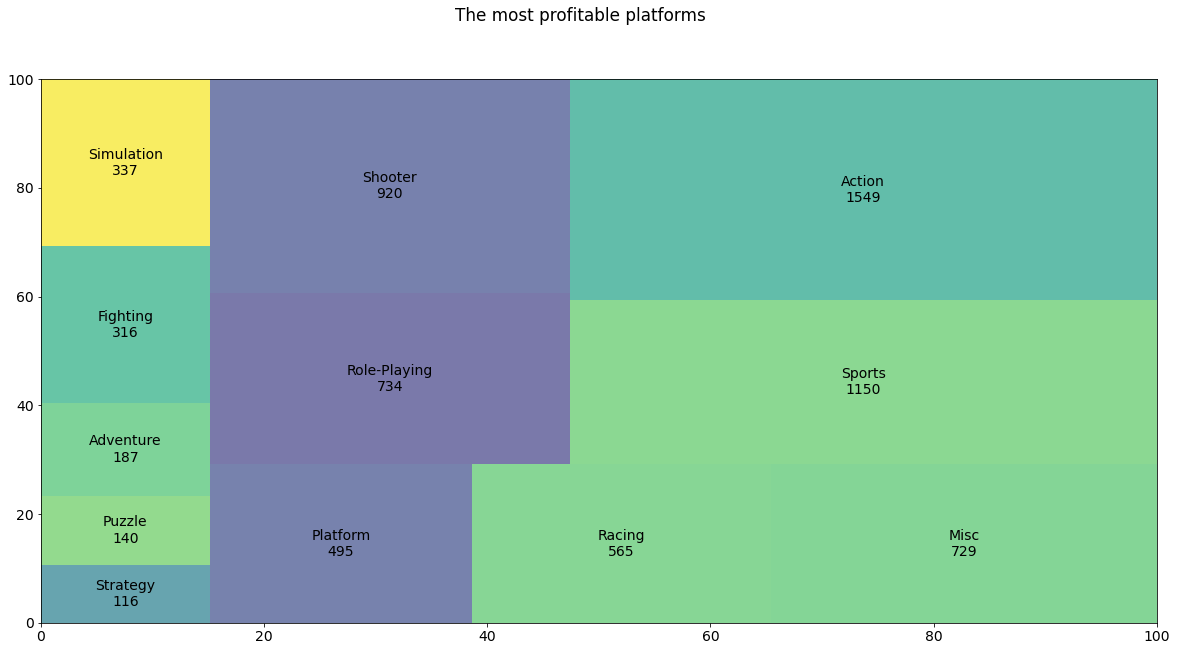

In [63]:
genres_total = games_good.query('year_of_release >= 2000 and year_of_release < 2017'
                                  )[['genre', 'total_sales']].groupby('genre').sum().sort_values('total_sales'
                                                                                                      ).reset_index()

plt.rc('font', size=14)
plt.figure(figsize=(20,10))
labels = genres_total.apply(lambda row: str(row[0])+'\n'+str(round(row[1])),axis=1)
squarify.plot(sizes=genres_total.total_sales, label=labels, alpha=0.7)
b = plt.suptitle("The most profitable platforms")    
plt.show()

The most profitable genres are:
- Action
- Sports
- Shooter
- Role-Playing

while the least profitable are:
- Strategy
- Puzzle
- Adventure

It seems that **dynamic** games (with speed, reaction) are more popular than games with **static** content such as puzzles and strategy.

Let's look at other factors such as:
- rating
- platform
- sales by region

In [65]:
# build a pivot table with rating share inside genre
genre_rating = games_good.query('year_of_release >= 2000 and year_of_release < 2017').pivot_table(index='genre', columns='rating',
                            values='year_of_release', aggfunc='count', margins=True, dropna=True, fill_value=0)
genre_rating = genre_rating.div( genre_rating.iloc[:,-1], axis=0 )
genre_rating.drop('All', inplace=True)
genre_rating.drop('All', axis=1, inplace=True)
genre_rating = genre_rating.reindex(genres_total['genre'])
genre_rating

rating,AO,E,E10+,M,RP,T
genre,,,,,,
Strategy,0.000000,0.220472,0.209974,0.068241,0.007874,0.493438
Puzzle,0.000000,0.841709,0.125628,0.000000,0.000000,0.032663
Adventure,0.000000,0.351449,0.134058,0.262681,0.000000,0.251812
Fighting,0.000000,0.021912,0.043825,0.113546,0.000000,0.820717
Simulation,0.000000,0.590461,0.078947,0.008224,0.000000,0.322368
Platform,0.000000,0.655639,0.237594,0.006015,0.000000,0.100752
Racing,0.000000,0.662898,0.115108,0.019527,0.001028,0.201439
Misc,0.000000,0.550146,0.173320,0.017527,0.001947,0.257059
Role-Playing,0.000000,0.107103,0.135287,0.205186,0.000000,0.552424


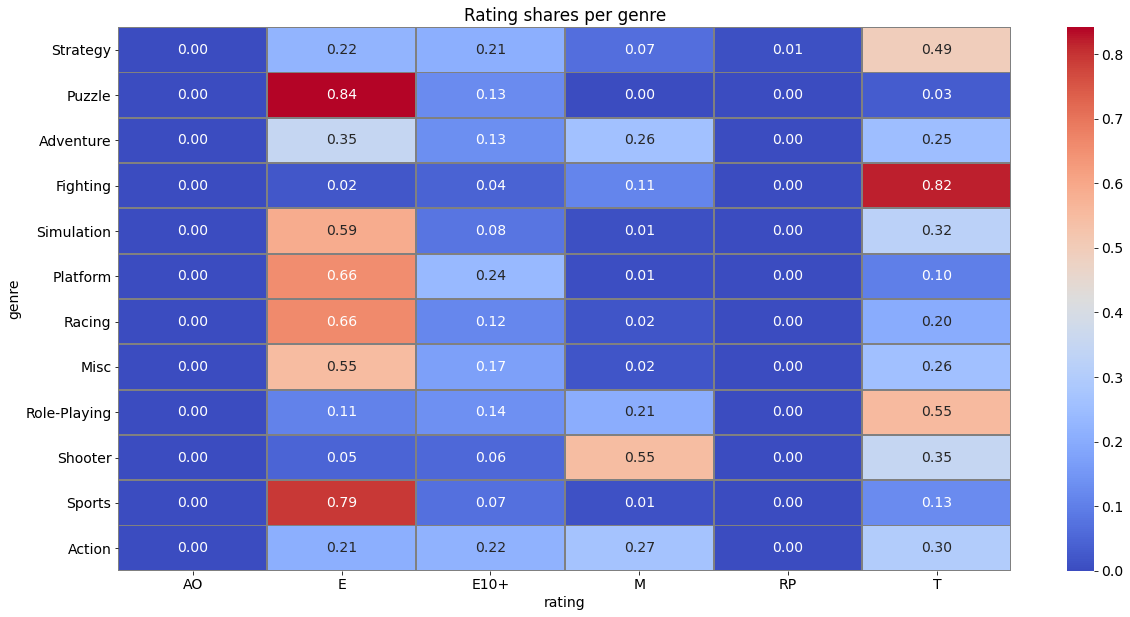

In [67]:
# build heatmap to see if rating has an effect
plt.figure(figsize=(20,10))
b= sns.heatmap(genre_rating,  annot=True,  fmt='.2f', linewidths=1, linecolor='gray', cmap= 'coolwarm').set_title("Rating shares per genre")

No strong influence of rating on the more profitable genres: every rating type occurs for high and low profit games with alternating frequency.

In [68]:
# build a pivot table with platform share inside genre
genre_platform = games_good.query('year_of_release >= 2000 and year_of_release < 2017').pivot_table(index='genre', columns='platform',
                            values='year_of_release', aggfunc='count', margins=True, dropna=True, fill_value=0)
genre_platform = genre_platform.div( genre_platform.iloc[:,-1], axis=0 )
genre_platform.drop('All', inplace=True)
genre_platform.drop('All', axis=1, inplace=True)
genre_platform = genre_platform.reindex(genres_total['genre'])
genre_platform

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
genre,,,,,,,,,,,,,,,,,,,,
Strategy,0.026930,0.000000,0.141831,0.003591,0.032316,0.019749,0.005386,0.310592,0.014363,0.127469,0.043088,0.010772,0.104129,0.012567,0.003591,0.044883,0.005386,0.050269,0.037702,0.005386
Puzzle,0.041152,0.000000,0.485597,0.002058,0.084362,0.026749,0.008230,0.051440,0.010288,0.037037,0.006173,0.002058,0.090535,0.006173,0.000000,0.111111,0.008230,0.014403,0.014403,0.000000
Adventure,0.031667,0.006667,0.198333,0.001667,0.031667,0.016667,0.000000,0.050833,0.015833,0.163333,0.060000,0.023333,0.177500,0.077500,0.000000,0.069167,0.002500,0.040000,0.021667,0.011667
Fighting,0.021572,0.010786,0.055470,0.000000,0.035439,0.064715,0.007704,0.007704,0.027735,0.228043,0.117103,0.027735,0.114022,0.024653,0.000000,0.064715,0.007704,0.100154,0.073960,0.010786
Simulation,0.039642,0.000000,0.359335,0.000000,0.023018,0.015345,0.002558,0.148338,0.008951,0.115090,0.039642,0.007673,0.035806,0.005115,0.000000,0.111253,0.001279,0.051151,0.030691,0.005115
Platform,0.038462,0.001374,0.125000,0.006868,0.195055,0.100275,0.012363,0.015110,0.024725,0.140110,0.050824,0.016484,0.049451,0.012363,0.000000,0.079670,0.023352,0.034341,0.067308,0.006868
Racing,0.010446,0.002849,0.063628,0.000000,0.060779,0.059829,0.009497,0.056030,0.032289,0.204179,0.087369,0.018044,0.059829,0.010446,0.000000,0.087369,0.002849,0.098765,0.116809,0.018993
Misc,0.033395,0.000000,0.239951,0.000618,0.068027,0.022263,0.001237,0.012987,0.012369,0.136673,0.077304,0.012369,0.065553,0.014842,0.000000,0.171305,0.013605,0.077304,0.028448,0.011750
Role-Playing,0.067176,0.003053,0.150382,0.007634,0.055725,0.020611,0.003053,0.077863,0.012977,0.142748,0.089313,0.038931,0.145802,0.065649,0.001527,0.026718,0.005344,0.057252,0.017557,0.010687


Text(0.5, 1.0, 'Platform shares per genre')

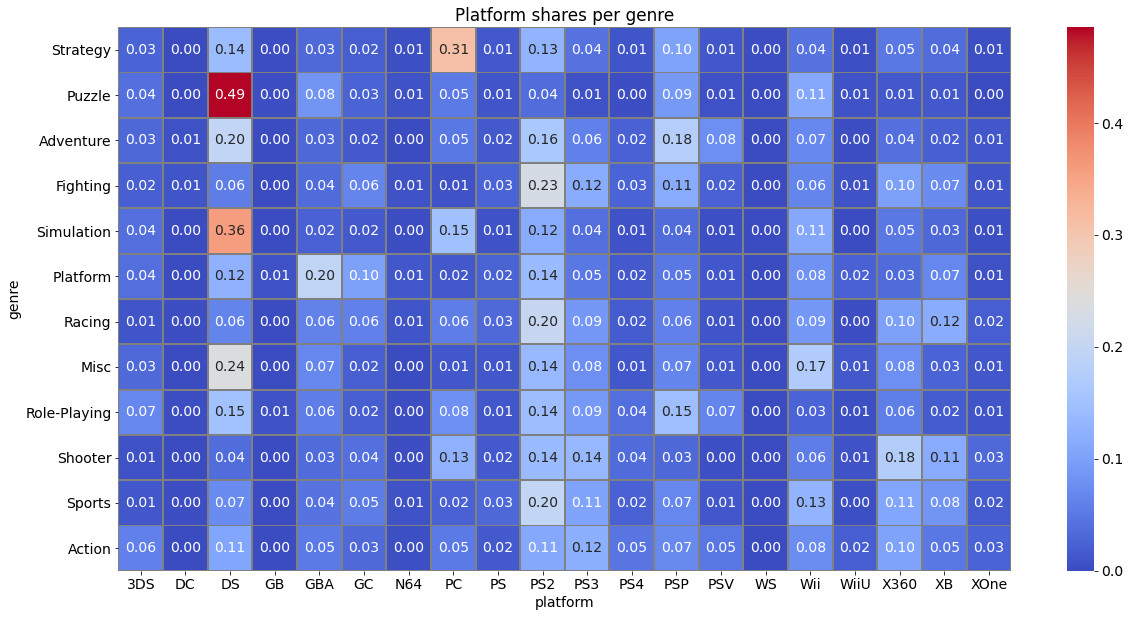

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(genre_platform, annot=True,  fmt='.2f', linewidths=1, linecolor='gray', cmap= 'coolwarm').set_title("Platform shares per genre")

From platforms heatmap we see that DS, PC and PSP platforms are usually used for less profitable genres (maybe these platforms are not perfect for the games where speed is very important). At the same time XB, X360 are used more for the profitable genres.

In [71]:
genre_sales = games_good.query('year_of_release >= 2000 and year_of_release < 2017').groupby('genre')[['na_sales','eu_sales','jp_sales','other_sales','total_sales']].sum()
genre_sales = genre_sales.div( genre_sales.iloc[:,-1], axis=0 )
genre_sales.drop('total_sales', axis=1, inplace=True)
genre_sales = genre_sales.reindex(genres_total['genre'])
genre_sales

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Strategy,0.402664,0.282853,0.238419,0.076064
Puzzle,0.464278,0.285346,0.177430,0.072946
Adventure,0.453571,0.266624,0.200075,0.079730
Fighting,0.516229,0.239829,0.142012,0.101930
Simulation,0.485237,0.310873,0.119286,0.084603
Platform,0.520555,0.283860,0.111546,0.084038
Racing,0.484877,0.342950,0.049172,0.123001
Misc,0.510408,0.272181,0.118538,0.098873
Role-Playing,0.385649,0.212749,0.331167,0.070435


Text(0.5, 1.0, 'Sales shares per genre')

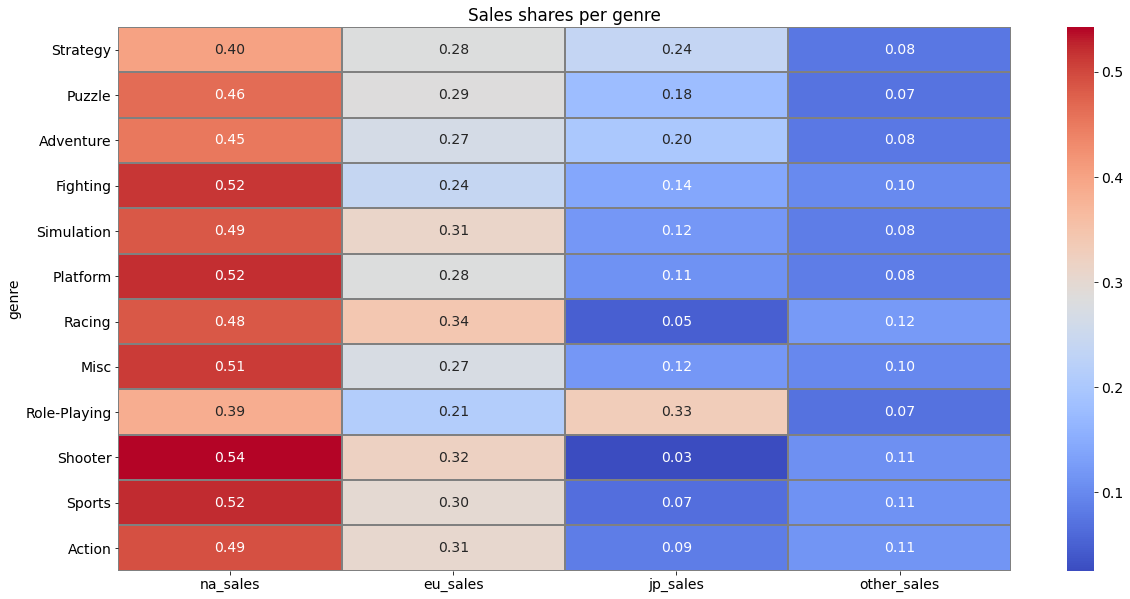

In [72]:
plt.figure(figsize=(20,10))
sns.heatmap(genre_sales, annot=True,  fmt='.2f', linewidths=1, linecolor='gray', cmap= 'coolwarm').set_title("Sales shares per genre")

NA, EU and other region sales do not have any special effect on more profitable genres but JP sales share is higher for less profitable genres than for top 3 most profitable genres.

### Step 4. Create a user profile for each region
For each region (NA, EU, JP), determine:

- The top five platforms. Describe variations in their market shares from region to region.
- The top five genres. Explain the difference.
- Do ESRB ratings affect sales in individual regions?

In [76]:
# Prepare data to get Region - Platform - Sales table
platform_sales = games_good.query('year_of_release >= 2012 and year_of_release < 2017').groupby('platform')[['na_sales','eu_sales','jp_sales','other_sales','total_sales']].sum().reset_index()
region_platform = platform_sales.pivot_table(columns='platform').stack().reset_index()
region_platform.columns = ['region', 'platform', 'sales']
region_platform

# build a treemap to get top 5 platforms for each region
fig = px.treemap(region_platform, path=['region', 'platform'], values='sales', title="Platform market shares per region")
fig.show()


We've got the following results:

- NA:
    - X360 (140)
    - PS4 (108)
    - PS3 (103)
    - XOne (93)
    - 3DS (55)
- EU:
    - PS4 (141)
    - PS3 (107)
    - X360 (74)
    - XOne (51)
    - 3DS (42)    
- JP:
    - 3DS (87)
    - PS3 (35)
    - PSV (21)
    - PS4 (16)
    - WiiU (13)

NA and JP are regions that produce game platforms (Microsoft in NA and Sony, Nintendo in Japan) so that's the reason the local vendors have the leading positions in these regions: in NA it's Microsoft's X360 (though Sony is behind but very close to it), in JP there's no Microsoft in top5. In EU JP wins 2 first places of market leaving X360 behind on the 3d place.

In [77]:
# Prepare data to get Region - Genre - Sales table
genre_sales = games_good.query('year_of_release >= 2012 and year_of_release < 2017').groupby('genre')[['na_sales','eu_sales','jp_sales','other_sales','total_sales']].sum().reset_index()
region_genre = genre_sales.pivot_table(columns='genre').stack().reset_index()
region_genre.columns = ['region', 'genre', 'sales']
region_genre

# build a treemap to get top 5 platforms for each region
fig = px.treemap(region_genre, path=['region', 'genre'], values='sales', title="Genre market shares per region")
fig.show()

We've got the following results:

- NA:
    - Action (178)
    - Shooter (145)
    - Sports (82)
    - Role-Playing (64)
    - Misc (38)

- EU:
    - Action (160)
    - Shooter (114)
    - Sports (69)
    - Role-Playing (49)
    - Racing (27)    
- JP:
    - Role-Playing (66)
    - Action (53)
    - Misc (13)
    - Simulation (10)
    - Fighting (9)

While NA and EU have similar tastes (Action, Sports, Shooter and Role-Playing are the leaders), JP region likes Role-Playing at most though still Action is in top5.

As to unique genres in top5: EU has Racing and JP has Simulation and Fighting on the 4th and 5th places. Perhaps Role-Playing game is more popular in Japan due to easten traditions and interest to legends, dragons. 

In [78]:
# Prepare data to get Region - Rating - Sales table
rating_sales = games_good.query('year_of_release >= 2012 and year_of_release < 2017').groupby('rating')[['na_sales','eu_sales','jp_sales','other_sales','total_sales']].sum().reset_index()
region_rating = rating_sales.pivot_table(columns='rating').stack().reset_index()
region_rating.columns = ['region', 'rating', 'sales']


# build a treemap to get top 5 platforms for each region
fig = px.treemap(region_rating, path=['region', 'rating'], values='sales', title="Rating shares per region")
fig.show()

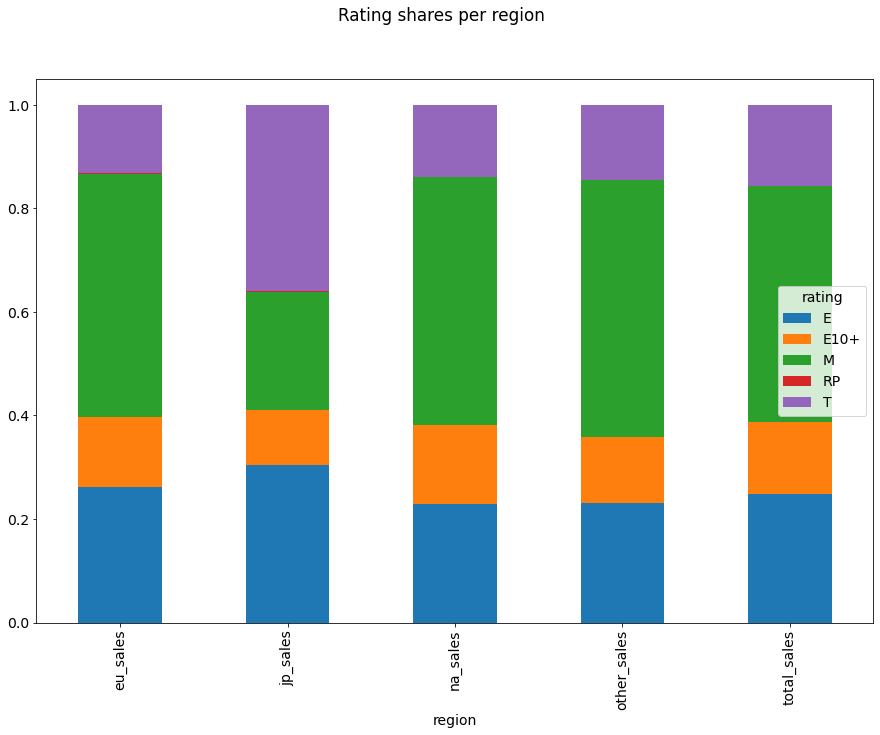

In [79]:
# Let's calculate the share of total sales for each rating for each region
region_rating_pivot = region_rating.pivot_table(index='region', columns='rating',values='sales', aggfunc='sum', margins=True, dropna=True, fill_value=0)
region_rating_pivot = region_rating_pivot.div( region_rating_pivot.iloc[:,-1], axis=0 )
region_rating_pivot.drop('All', inplace=True)
region_rating_pivot.drop('All', axis=1, inplace=True)
region_rating_pivot.plot(kind='bar', stacked=True, figsize=(15,10))
b = plt.suptitle("Rating shares per region")   

The best seller for NA and EU regions is M (Mature) rating type which holds ~45% share of the sales. Everyone for NA and EU takes ~20% of the market. For JP Teen rating occupies almost 40% while Everyone - ~30% and Mature ~20%.

### Step 5. Test the following hypotheses:

- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

Let's set the alpha threshold to 0.05 as a typical significance level. 

1. For the first test:

$H_0$: Average user ratings of the Xbox One and PC platforms are **the same**

$H_1$: Average user ratings of the Xbox One and PC platforms are **different**

2. For the second test:

$H_0$: Average user ratings for the Action and Sports genres are **the same**

$H_1$: Average user ratings for the Action and Sports genres are **different**

In [66]:
alpha = 0.05

xone = games_good.query('year_of_release >= 2012 and year_of_release < 2017 and platform=="XOne"')
xone = xone[xone['user_score'].notna()]['user_score']

pc = games_good.query('year_of_release >= 2012 and year_of_release < 2017 and platform=="PC"')
pc = pc[pc['user_score'].notna()]['user_score']

result = st.ttest_ind(xone, pc)

print('p-value: ', result.pvalue)
if result.pvalue < alpha:
    print('p-value is below significance level, so we have to reject the null hypothesis!')
else:
    print('p-value is above significance level, so we do not reject the null hypothesis!')

p-value:  0.2822500210470965
p-value is above significance level, so we do not reject the null hypothesis!


In [67]:
action = games_good.query('year_of_release >= 2012 and year_of_release < 2017 and genre=="Action"')
action = action[action['user_score'].notna()]['user_score']

sports = games_good.query('year_of_release >= 2012 and year_of_release < 2017 and genre=="Sports"')
sports = sports[sports['user_score'].notna()]['user_score']

result = st.ttest_ind(action, sports)

print('p-value: ', result.pvalue)
if result.pvalue < alpha:
    print('p-value is below significance level, so we have to reject the null hypothesis!')
else:
    print('p-value is above significance level, so we do not reject the null hypothesis!')



p-value:  1.345318033467423e-32
p-value is below significance level, so we have to reject the null hypothesis!


So the test results for the last 5 years period are:


$H_0$: Average user ratings of the Xbox One and PC platforms are **the same**

$H_1$: Average user ratings for the Action and Sports genres are **different**

### Step 6. Write a general conclusion

We've studied the data on games and observed the following:

1. Game platforms have a lifecycle of 10 years, it generally takes ~5 years for the platform to fade out.
2. Taking it into account we've considered the global market leaders during the last 5 years. It turns that the most profitable platforms are:
    - **PS4** the youngest and potentially the most profitable
    - **XOne** (less profitable compared to PS4 but has the same dynamic in sales)
    - PS3 (seen as shrinking above)
    - X360 (seen as shrinking above)
    - 3DS (seen as shrinking above)

3. The most profitable genres are:
    - Action
    - Sports
    - Shooter
    - Role-Playing
    - Misc

The first three are leaders in NA and EU while Role-Playing is a leader in JP.

4. Games rated with 'M' are the most profitable (~45% sales share) with 'E' holding the 2nd place of ~20% in NA and EU while 'T' and 'E' are almost equally profitable leaders in JP. 
5. In NA region Microsoft platforms are more popular while in EU and JP Sony is the leader. In JP 3DS platform is still a leader.

**Recommendation**: Advertise the youngest platforms as most promising: PS4 and XOne. In NA region XOne should be promoted more while in EU and JP we should promote PS4. Regarding genres we should promote Action, Sports, Shooter and Role-Playing making accent on Role-Playing in JP. Games rated 'M' should be more promoted in NA and EU while in JP we should promote 'T' and 'E' ratings.